In [1]:
import sys
print(sys.executable)
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

D:\software\Miniconda\miniConda\envs\plot\python.exe


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [50]:
#Cell fraction predicted by DeSide
my_datasets ={}
t_sne_datasets = {}
ori_datasets ={}
# Select the cancer type form TCGA using the condition that Pearson correlation coefficients (r) between the DeSide-predicted tumor purity and CPE values are greater than 0.6 and the RMSEs are less than 0.15.
beter_pre = 'ACC\HNSC\LUAD\BLCA\KICH\LUSC\BRCA\CESC\KIRP\READ\COAD\LGG\GBM\LIHC'  #20240110


beter_pre_list = beter_pre.split('\\')
new_deside_data_path = r'D:\EMT\EMT\data\xiongxin_raw_data_0914\2023_\all_predicted_cell_fraction_by_DeSide_20231110_02_D1+D2.csv'   #2023新数据                                        

new_deside_data = pd.read_csv(new_deside_data_path,index_col=0)
# new_deside_data.index = new_deside_data.index.str.rsplit('-',1).str[0]    # change the index to fit the data. for example, change TCGA-C4-A0F1-01A to TCGA-C4-A0F1    
# new_deside_data  = new_deside_data.loc[:,['cancer_type','B Cells','CD4 T','CD8 T','Endothelial Cells','Fibroblasts','Macrophages']]
new_deside_data  = new_deside_data.loc[:,['cancer_type','Cancer Cells']]

count= 0
for i in beter_pre_list:
    cf_new = new_deside_data.loc[new_deside_data['cancer_type']==i,:]
    count+=1
    
    if count==1:
        cf_new_all = cf_new
    else:
        cf_new_all = pd.concat([cf_new_all,cf_new],join='inner',axis=0)


print(i,'----------------')
print('The number of duplicated samples: ',cf_new_all.index.duplicated().sum())
print('Duplicated samples id: ',cf_new_all.index[cf_new_all.index.duplicated(keep='first') ])
print('Number of samples before deletion: ',len(cf_new_all))
cf_new_all = cf_new_all[~cf_new_all.index.duplicated(keep='first')]    #delete duplicated samples 
print('Number of samples after deletion: ',len(cf_new_all))


LIHC ----------------
The number of duplicated samples:  0
Duplicated samples id:  Index([], dtype='object', name='sample_id')
Number of samples before deletion:  5433
Number of samples after deletion:  5433


In [31]:
CPE_path = r'D:\EMT\EMT\data\xiongxin_raw_data_0914\2022\datasets\cancer_purity\cancer_purity.csv'
cpe = pd.read_csv(CPE_path,index_col=0)
cpe = cpe[['CPE']]

cf_cpe = pd.concat([cf_new_all,cpe],join='inner',axis=1)#3586
cf_cpe = cf_cpe.drop('cancer_type',axis=1,inplace=False)  #3586个
cf_cpe = cf_cpe.dropna(how='any')  
# cf_cpe.isnull().any(axis=1)  
# cf_cpe.isnull().any(axis=1).sum()  
cf_cpe

,Cancer Cells,CPE
TCGA-OR-A5LO-01A,0.837,0.9954
TCGA-P6-A5OG-01A,0.478,0.4616
TCGA-OR-A5J6-01A,0.591,0.8396
TCGA-OR-A5LT-01A,0.960,0.9503
TCGA-OR-A5JY-01A,0.819,0.9026
...,...,...
TCGA-CC-A8HT-01A,0.915,0.3755
TCGA-CC-A8HV-01A,0.977,0.8731
TCGA-GJ-A9DB-01A,0.751,0.7913
TCGA-BD-A3ER-01A,0.803,0.7188


In [32]:
# Delete values less than 0.1.
cf_cpe.sort_values(by="Cancer Cells" , inplace=True, ascending=True)
cf_cpe = cf_cpe.loc[cf_cpe['Cancer Cells']>0.1,:]
cf_cpe

,Cancer Cells,CPE
TCGA-4A-A93Y-01A,0.104,0.3276
TCGA-85-A4PA-01A,0.104,0.1477
TCGA-AN-A0FN-01A,0.127,0.4000
TCGA-IQ-A61O-01A,0.128,0.6849
TCGA-A2-A0EP-01A,0.130,0.3512
...,...,...
TCGA-DM-A1D6-01A,0.987,0.9916
TCGA-DD-A39Y-01A,0.989,0.8985
TCGA-CC-5259-01A,0.990,0.7234
TCGA-BC-A5W4-01A,0.991,0.9763


In [33]:
#https://blog.csdn.net/longwei92/article/details/82899604
#"cf_cpe" grouping

#00-0.1，0.1-0.2
# listBins = [0, 0.1, 0.2,0.25, 0.3,0.35, 0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
# listLabels=[0.05,
#  0.15,
#  0.225,
#  0.275,
#  0.325,
#  0.375,
#  0.425,
#  0.475,
#  0.525,
#  0.575,
#  0.625,
#  0.675,
#  0.725,
#  0.775,
#  0.825,
#  0.875,
#  0.925,
#  0.975]


# There are no groups with values less than 0.1. 
listBins = [0.1, 0.2,0.25, 0.3,0.35, 0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
listLabels=[
 0.15,
 0.225,
 0.275,
 0.325,
 0.375,
 0.425,
 0.475,
 0.525,
 0.575,
 0.625,
 0.675,
 0.725,
 0.775,
 0.825,
 0.875,
 0.925,
 0.975]



cf_cpe['class'] = pd.cut(cf_cpe['Cancer Cells'], bins=listBins, labels=listLabels, include_lowest=True)
cf_cpe['class'].unique()
cf_cpe_box = cf_cpe.drop('Cancer Cells',axis=1,inplace=False)
cf_cpe_box['class'] = cf_cpe_box['class'].astype(float)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4400\2136714658.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf_cpe['class'] = pd.cut(cf_cpe['Cancer Cells'], bins=listBins, labels=listLabels, include_lowest=True)


In [40]:
# Filtering data that is NaN
df = pd.DataFrame()
for i in listLabels:
    k= pd.DataFrame(cf_cpe.loc[cf_cpe['class']==i,'CPE'].reset_index(drop=True))
    k.rename(columns = {"CPE": i},  inplace=True)
    if i == 0.05:
        df = k
    else:
        df = pd.concat([df,k],axis=1)

mask = ~np.isnan(df)
filtered_data = [df[d][mask[m]] for d, m in zip(df, mask)]
filtered_data

[0     0.3276
 1     0.1477
 2     0.4000
 3     0.6849
 4     0.3512
 5     0.4622
 6     0.6509
 7     0.1344
 8     0.2489
 9     0.4118
 10    0.7352
 11    0.5651
 12    0.4083
 13    0.2232
 14    0.6578
 15    0.6369
 16    0.5505
 17    0.3776
 18    0.4644
 Name: 0.15, dtype: float64,
 0     0.3275
 1     0.3703
 2     0.5895
 3     0.6289
 4     0.5918
 5     0.2093
 6     0.5642
 7     0.2080
 8     0.4138
 9     0.1926
 10    0.5016
 11    0.5186
 12    0.4856
 13    0.3802
 14    0.4458
 15    0.5218
 16    0.6702
 17    0.4181
 18    0.5632
 Name: 0.225, dtype: float64,
 0     0.3605
 1     0.2098
 2     0.4862
 3     0.5144
 4     0.5387
 5     0.5043
 6     0.5077
 7     0.4704
 8     0.5013
 9     0.5808
 10    0.6169
 11    0.6539
 12    0.5404
 13    0.3401
 14    0.4285
 15    0.3047
 16    0.3431
 17    0.5055
 18    0.4812
 19    0.3857
 20    0.4400
 21    0.5679
 22    0.3308
 23    0.4190
 24    0.3034
 25    0.1632
 26    0.5672
 27    0.4164
 Name: 0.275, dty

In [35]:
from matplotlib.pylab import mpl
# import scienceplots    # Whether to import depends on the version.
def set_fig_style(font_family=None, font_size=None):
    # set_fig_style(font_family='Arial', font_size=8)
    fig, ax = plt.subplots()
    
    try:
        sns.set_style("white")
        plt.style.use(['science','no-latex'])
    except:

        print('No science style')      
        sns.set(palette='muted', font_scale=1.5)
    sns.set_style("white")
    mpl.rcParams['figure.dpi'] = 300
    mpl.rcParams['figure.facecolor'] = 'white'
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'
    if font_family:
        mpl.rcParams['font.family'] = font_family
    if font_size:
        mpl.rcParams['font.size'] = font_size  
    # print('figure.dpi will be set to', mpl.rcParams['figure.dpi'])
    plt.close('all')
set_fig_style(font_family='Arial', font_size=8)

No science style


No science style


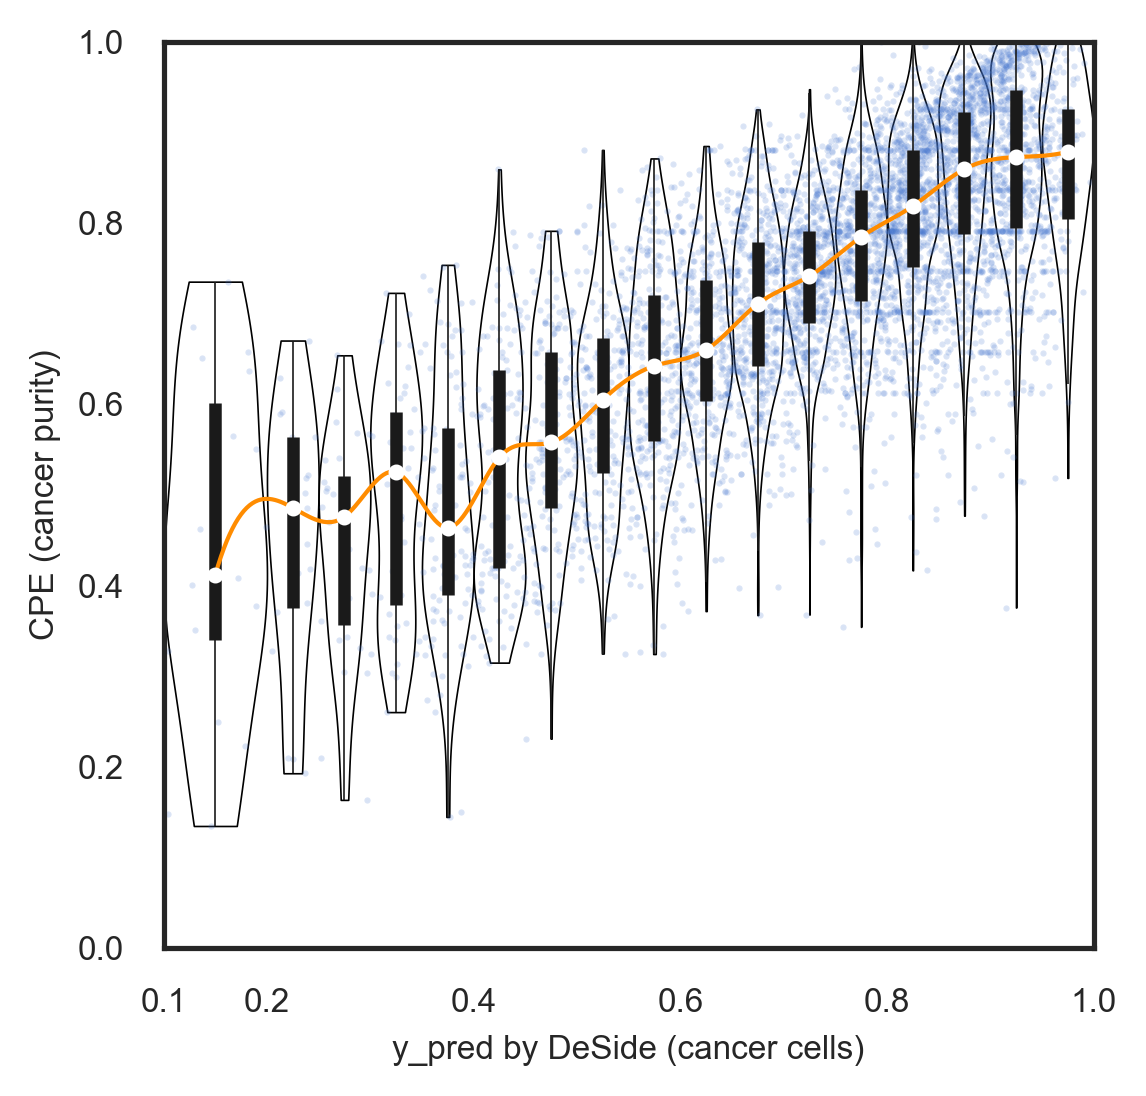

In [38]:
#Violin plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import mpl


from scipy.interpolate import make_interp_spline


def smooth_xy(lx, ly):
    """Smooth processing data

    :param lx: data of X-axis
    :param ly: data of Y-axis
    :return: data after smooth [slx, sly]
    """
    x = np.array(lx)
    y = np.array(ly)
    x_smooth = np.linspace(x.min(), x.max(), 300)    #300 can be changed
    y_smooth = make_interp_spline(x, y)(x_smooth)
    return [x_smooth, y_smooth]

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, listBins):
#     ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)   #
    ax.set_xticks(ticks=listBins,labels=listBins) 

    ax.set_xlim(0.1, 1)    #   ax.set_xlim(listBins[0]-0.05, listBins[-1]+0.05)  
    ax.set_ylim(0,1)






data1 = [sorted(i) for i in filtered_data]
data = [sorted(a) for i,a in df.items()]



set_fig_style(font_family='Arial', font_size=8)
fig,  ax2= plt.subplots(figsize=(4, 4))   #7,4
# A situation where group values are divided into two ranges: 0-0.1 and 0.1-0.2.
# position = (0.05,  0.15, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525,0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975)
# width=    (0.1,   0.1,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05, 0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05)


# A situation where values less than 0.1 are deleted.
position = (0.15, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525,0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975)
width=    (0.1,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05, 0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05)
ax2.set_title('')

ax2.set_ylabel('CPE (cancer purity)',fontsize=8)   #,f
ax2.set_xlabel('y_pred by DeSide (cancer cells)',fontsize=8)  #


parts = ax2.violinplot(
        data1,widths=width,positions=position,showmeans=False, showmedians=False,    #np.array(data1) 
        showextrema=False)  #,bw_method=10    
for pc in parts['bodies']:
    pc.set_facecolor('white')  ##D43F3A  white   darkorange
    pc.set_alpha(1)
    pc.set_edgecolor('black')  #color=' coral '   darkorange
    pc.set_alpha(1)
    pc.set_linewidth(0.4)      #pc.set_linewidth(0.8)


quartile1, medians, quartile3 =np.nanpercentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data1, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = position
ax2.scatter(inds, medians, marker='o', color='white', s=8, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3)  #color='k'
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=0.4)  #color='k'
plt.scatter(x=cf_cpe['Cancer Cells'],y=cf_cpe['CPE'],marker = '.',s=1,alpha=0.2,rasterized=True)   #,color='gray'   #s=10
xy_s = smooth_xy(df.median().index, df.median().values)
plt.plot(xy_s[0],xy_s[1],color='darkorange',linewidth=1)  #1.8


#####Calculate 95% confidence intervals of data
#https://blog.csdn.net/with_still_water/article/details/102511633


lower_interval_list =[]
upper_interval_list =[]
interval_a=[]   #interval: The median values in the figures in the appendix
interval_b=[]   #interval: The 95% confidence intervals of the figures in the appendix
for i in filtered_data:
    split_data = np.array(i)

    ##
    mean, scale = np.mean(split_data), np.std(split_data)
    #t distribution
#     mean, scale = np.mean(split_data), stats.sem(split_data)
#     conf_int = stats.norm.interval(0.95, loc=mean,scale=scale)
    alpha = 0.95
#     df_ = len(filtered_data) - 1
#     conf_int = stats.t.interval(alpha, df_, loc=mean, scale=scale)
    conf_int = stats.norm.interval(alpha, loc=mean, scale=scale)
    lower_interval = conf_int[0]
    upper_interval = conf_int[1]
    lower_interval_list.append(lower_interval)
    upper_interval_list.append(upper_interval)
    #data of supporting information
    A,B = conf_int[0],conf_int[1]
    a = A+(B-A)/2
    b = (B-A)/2
    interval_a.append(a)
    interval_b.append(b)
    

# set style for the axes
listBins1= [0.1,0.2,0.4,0.6,0.8,1.0]

for ax in [ax2]:
    set_axis_style(ax, listBins1)
aaa = plt.xlim()
plt.xlim(0.1,1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# plt.xticks([0.1,0.3,0.6,1])
plt.savefig(r'D:\EMT\EMT\jupyter_and_results_2022\cluster_and_survival_curve\results\voilin_deside\2023\x_vs_y_final_model_0110_1.pdf',dpi=300)

In [39]:
#Caculate the confidence interval

from scipy.stats import norm
confidence_level = 0.95 # set the confidence level to 95%
df_interval = pd.DataFrame([])
for i in filtered_data:

    mean, std_dev = norm.fit(i) # fitting data
    lower, upper = norm.interval(confidence_level, loc=mean, scale=std_dev) 
    df_interval.loc[i.name,'mean'] = mean
    df_interval.loc[i.name,'lower boundary (2.5%)'] = lower
    df_interval.loc[i.name,'upper boundary (97.5%)'] = upper
df_interval.to_csv(r'D:\EMT\EMT\jupyter_and_results_2022\cluster_and_survival_curve\results\voilin_deside\2023\df_interval.csv')   